<a href="https://colab.research.google.com/github/Farhansyah15/PraktikumML156-22/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/Machine Learning

/content/drive/MyDrive/Machine Learning


In [4]:
!ls

data-master


In [5]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# split dataset
data_dir = '/content/drive/MyDrive/Machine Learning/data-master'
output = '/content/drive/MyDrive/Machine Learning/split_data'
splitfolders.ratio(data_dir, output=output, seed=1337, ratio=(.7, 0.1, 0.2))

Copying files: 12506 files [05:10, 40.27 files/s] 


In [8]:
import os

# create train, val, test paths
base_dir = '/content/drive/MyDrive/Machine Learning/split_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [9]:
import cv2
import numpy as np

# gather train dataset
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [10]:
# gather validation data
valX = []
valY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [11]:
#Tampilkan shape
print("Train Data = ", trainX.shape)
print("Train Label = ", trainY.shape)
print("Validation Data = ", valX.shape)
print("Validation Label = ", valY.shape)

Train Data =  (8752, 150, 150, 3)
Train Label =  (8752,)
Validation Data =  (1249, 150, 150, 3)
Validation Label =  (1249,)


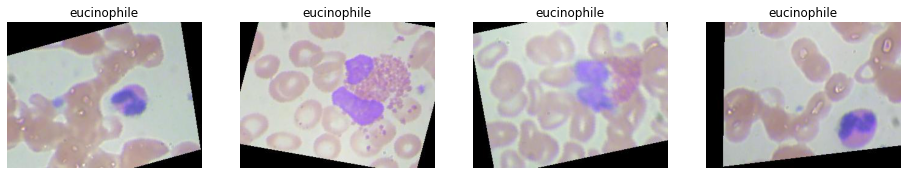

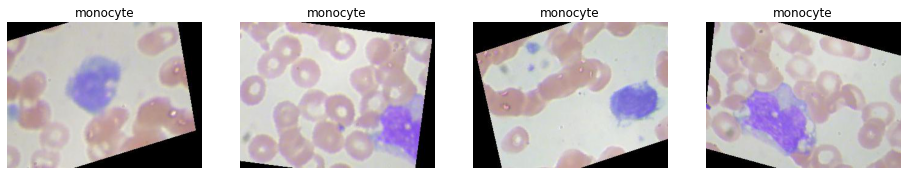

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

file_train_eosinophil=os.path.join("/content/drive/MyDrive/Machine Learning/split_data/train/EOSINOPHIL")
file_train_monocyte=os.path.join("/content/drive/MyDrive/Machine Learning/split_data/train/MONOCYTE")

eosinophil_image = os.listdir(file_train_eosinophil)
monocyte_image = os.listdir(file_train_monocyte)

fname1 = [os.path.join(file_train_eosinophil,fname)
        for fname in eosinophil_image[:4]]

fname2 = [os.path.join(file_train_monocyte,fname)
        for fname in monocyte_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('eucinophile')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('monocyte')
    plt.imshow(img)
    
plt.show()

In [14]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", trainY[:50])

lb = LabelEncoder()
y_train = lb.fit_transform(trainY)
y_val = lb.fit_transform(valY)

print("Label setelah di-encoder ", y_train[:50])

Label sebelum di-encoder  ['LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [15]:
#pengecekan nilai minimum dan maksimum pada datasets sebelum normalisasi
print('Train min=%.f, max=%.f' % (trainX.min(), trainX.max()))
print('Validation min=%.f, max=%.f' % (valX.min(), valX.max()))

Train min=0, max=255
Validation min=0, max=255


In [16]:
#normalisasi menggunakan ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_norm = datagen.flow(trainX, y_train, batch_size=64)
val_norm = datagen.flow(valX, y_val, batch_size=64)

In [17]:
#pengecekan nilai minimum dan maksimum pada datasets setelah normalisasi
batch_trainX, batch_trainy = train_norm.next()
batch_valX, batch_valy = val_norm.next()

print(f'Train min={batch_trainX.min()}, max={batch_trainX.max()}')
print(f'Validation min={batch_valX.min()}, max={batch_valX.max()}')

Train min=0.0, max=1.0
Validation min=0.0, max=1.0


In [18]:
np.save("xtrain64", trainX)
np.save("xval64",valX)
np.save('ytrain64', y_train)
np.save('yval64', y_val)

In [19]:
from google.colab import files
files.download('/content/drive/MyDrive/Machine Learning/xtrain64.npy')
files.download('/content/drive/MyDrive/Machine Learning/xval64.npy')
files.download('/content/drive/MyDrive/Machine Learning/ytrain64.npy')
files.download('/content/drive/MyDrive/Machine Learning/yval64.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>